In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

%matplotlib inline

file = r"amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file)

## Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II

**Objective**: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

---

### Part 1: Analyzing Best-Seller Trends Across Product Categories

**Objective**: Understand the relationship between product categories and their best-seller status.

1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

---


In [ ]:
#1 
df.head()

crosstab_cat_and_best = pd.crosstab(df["category"], df["isBestSeller"])
print("crosstab without propotion \n \n", crosstab_cat_and_best)
crosstab_cat_and_best['proportion_best_sellers'] = crosstab_cat_and_best[True] / (crosstab_cat_and_best[True] + crosstab_cat_and_best[False])
sorted_proportions = crosstab_cat_and_best.sort_values(by='proportion_best_sellers', ascending=False)
print("sorted proportion \n \n",sorted_proportions)

#top 5 prevalent categories as best seller -> 
# Grocery, 
# Smart Home Security & Lighting, 
# Health & Personal Care, 
# Mobile Phone Accessories, 
# Power & Hand Tools


crosstab without propotion 
 
 isBestSeller                    False  True 
category                                    
3D Printers                       247      1
3D Printing & Scanning           4065      2
Abrasive & Finishing Products     245      5
Action Cameras                   1696      1
Adapters                          251      3
...                               ...    ...
Wind Instruments                  243      7
Window Treatments                 234      5
Women                           17559    213
Women's Sports & Outdoor Shoes   1939     20
eBook Readers & Accessories       246      0

[296 rows x 2 columns]
sorted proportion 
 
 isBestSeller                      False  True  proportion_best_sellers
category                                                              
Grocery                            9008   556                 0.058135
Smart Home Security & Lighting       98     6                 0.057692
Health & Personal Care             9017   552         

isBestSeller,False,True,proportion_best_sellers
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
"Billiard, Snooker & Pool",241,8,0.032129
Pet Supplies,9152,285,0.030200
Home Brewing & Wine Making,239,7,0.028455
Wind Instruments,243,7,0.028000


In [30]:
#2
#chi²
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(sorted_proportions)

print(f" Chi Stats : {chi2_statistic}, \n Chi p_value : {chi2_p_value}")

#cramér V
crosstab_int = sorted_proportions.drop(columns=["proportion_best_sellers"])


print("Cramér V : ", association(crosstab_int, method="cramer"))
# association(crosstab_int, method="cramer")

 Chi Stats : 36684.23786636857, 
 Chi p_value : 0.0
Cramér V :  0.1222829439760564


C:\Users\aurel\AppData\Local\Temp\ipykernel_17864\3517947334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5_bestseller.drop(columns=["proportion_best_sellers"], inplace=True)


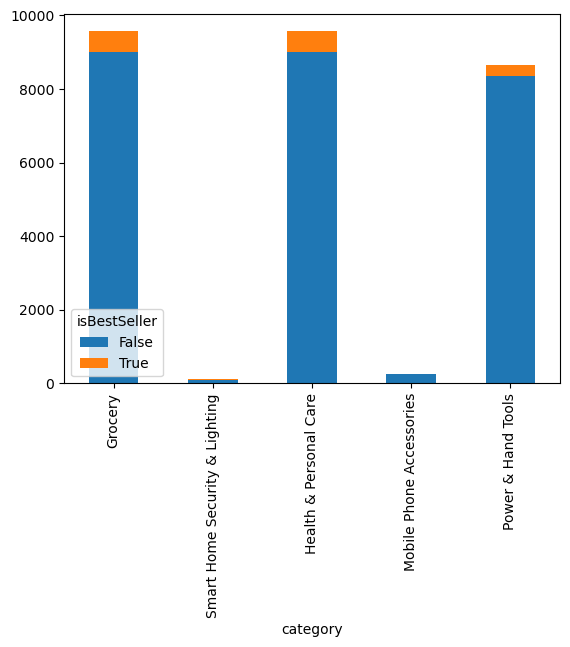

In [31]:
#3
top_5_bestseller = sorted_proportions.head(5)
top_5_bestseller.drop(columns=["proportion_best_sellers"], inplace=True)

top_5_bestseller.plot(kind="bar", stacked=True);

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands

**Objective**: Investigate how different product categories influence product prices.

0. **Preliminary Step: Remove outliers in product prices.**

	For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.
	
	*Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.*

1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

---

In [33]:
#0

"""
#from https://www.freecodecamp.org/news/python-switch-statement-switch-case-example/

def tukeys_test_outliers_2(data, method='identify'): #need default val
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    type_of_method = method

    match type_of_method:
        case "identify":
            outliers = data[(data < lower_bound) | (data > upper_bound)]
            return outliers

        case "replace":
            median_value = data.median()
            modified_data = data.copy()
            modified_data[(modified_data < lower_bound) | (modified_data > upper_bound)] = median_value
            return modified_data

        case "delete":
            filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]
            return filtered_data

        case _:
            raise ValueError("Method must be 'identify', 'replace', or 'delete'")

"""

df_outliers = df.copy()
    
Q1 = df_outliers.price.quantile(0.25)
Q3 = df_outliers.price.quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#identify outliers
outliers = df_outliers[(df_outliers['price'] < lower_bound) | (df_outliers['price'] > upper_bound)]
    
index_drop = outliers.index
df_no_outliers = df_outliers.drop(index_drop)



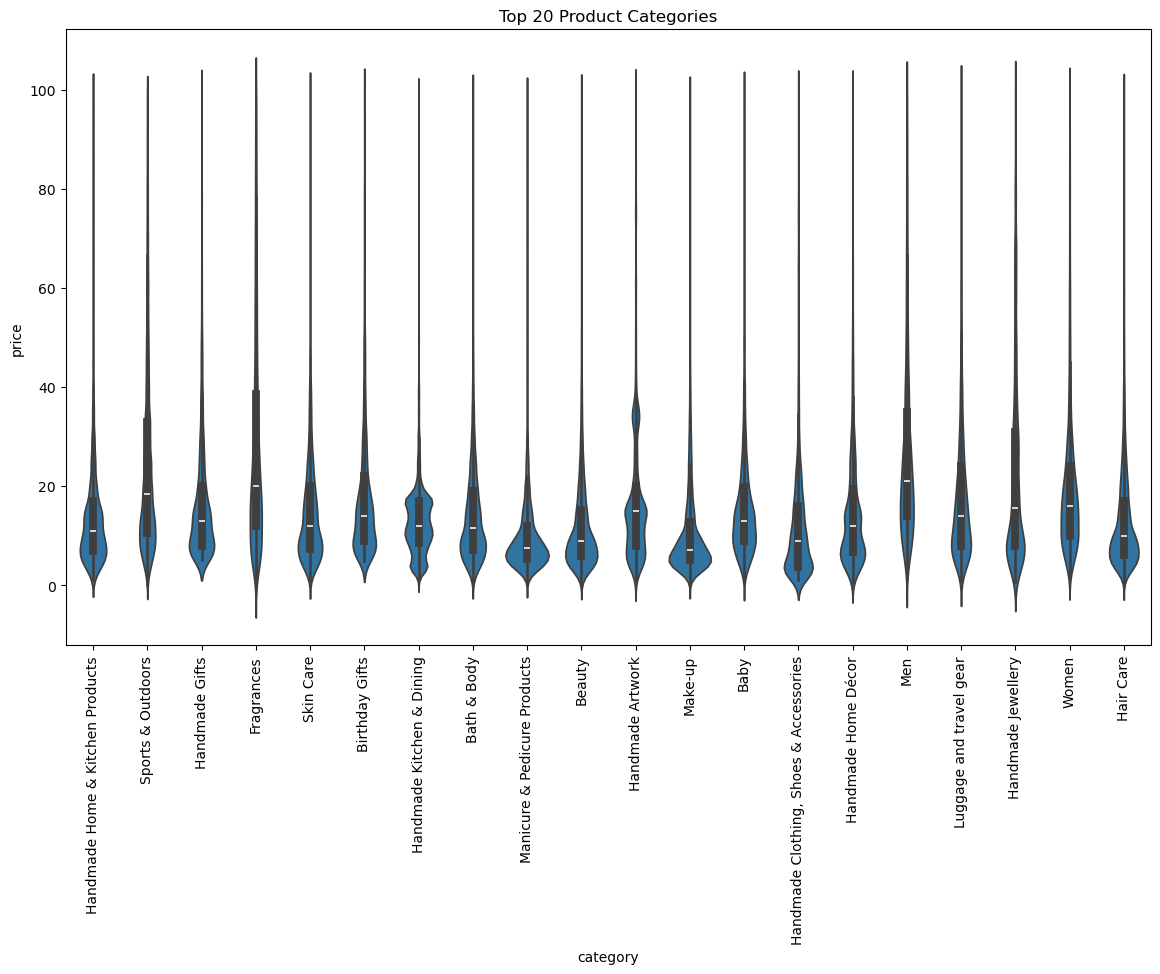

In [43]:
#1
category_count = df_no_outliers['category'].value_counts()

top_20_categories = category_count.head(20).index

top_20s = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]



plt.figure(figsize=(14, 8))
sns.violinplot(x='category', y='price', data=top_20s)
plt.title('Top 20 Product Categories')
plt.xticks(rotation=90)
plt.show()


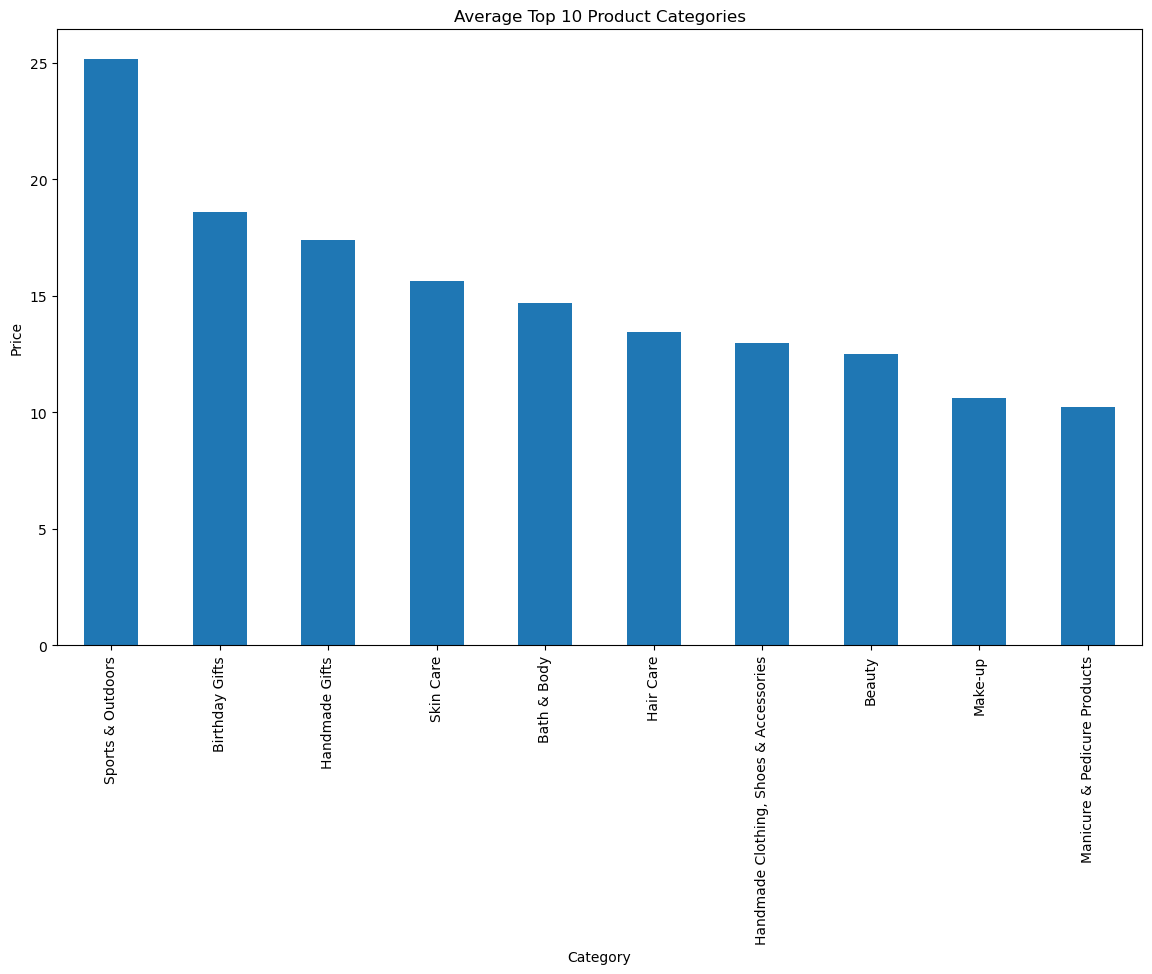

                  category      price
190           Motherboards  68.772432
34            Boxing Shoes  67.417803
75             Desktop PCs  66.915562
274                Tablets  66.552971
108         Graphics Cards  65.103509
..                     ...        ...
22     Bedding Accessories   8.835220
4                 Adapters   8.750197
246        Signs & Plaques   8.210513
8            Arts & Crafts   8.006540
209  Office Paper Products   6.876369

[296 rows x 2 columns]
Category highest average price: Motherboards with an average price of 68.77243243243242


In [52]:
#2

top_10_categories = df_no_outliers['category'].value_counts().head(10).index
top_10_avg_prices = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)].groupby('category')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
top_10_avg_prices.plot(kind='bar')
plt.title('Average Top 10 Product Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.show()


category_avg_price = df_no_outliers.groupby('category')['price'].mean().reset_index()
sorted_category_avg_price = category_avg_price.sort_values(by='price', ascending=False)
print(sorted_category_avg_price)
highest_avg_price_category = sorted_category_avg_price.iloc[0]
print(f"Category highest average price: {highest_avg_price_category['category']} with an average price of {highest_avg_price_category['price']}")


### Part 3: Investigating the Interplay Between Product Prices and Ratings

**Objective**: Analyze how product ratings (`stars`) correlate with product prices.

1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

**Bonus**: 

- Do the same analysis without taking out the outliers. What are your insights?

In [53]:
#1
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])
print(f"Correlation coefficient between price and stars: {correlation}")


Correlation coefficient between price and stars: -0.0776729987818137


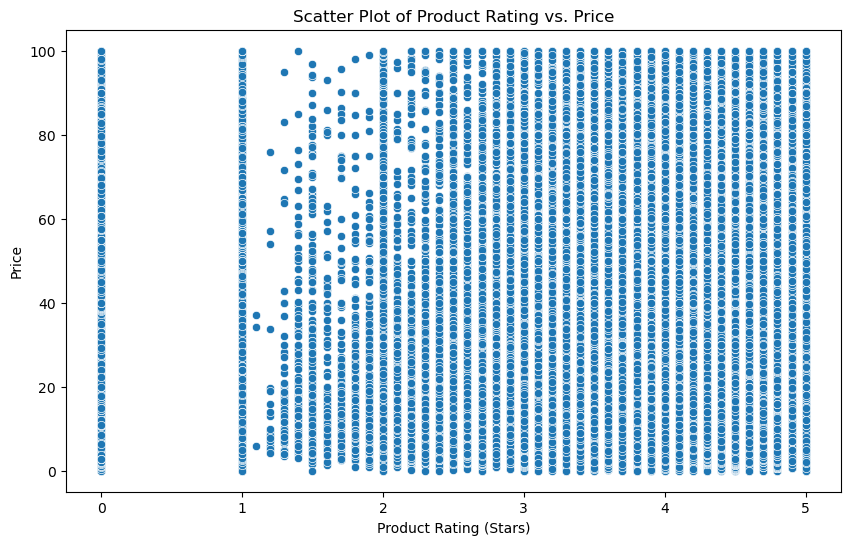

In [54]:
#2
plt.figure(figsize=(10, 6))
sns.scatterplot(x='stars', y='price', data=df_no_outliers)
plt.title('Scatter Plot of Product Rating vs. Price')
plt.xlabel('Product Rating (Stars)')
plt.ylabel('Price')
plt.show()


                        uid     stars   reviews     price  boughtInLastMonth
uid                1.000000  0.030288  0.020236  0.001717           0.017116
stars              0.030288  1.000000  0.083920 -0.077673           0.113994
reviews            0.020236  0.083920  1.000000 -0.008498           0.105624
price              0.001717 -0.077673 -0.008498  1.000000          -0.059051
boughtInLastMonth  0.017116  0.113994  0.105624 -0.059051           1.000000


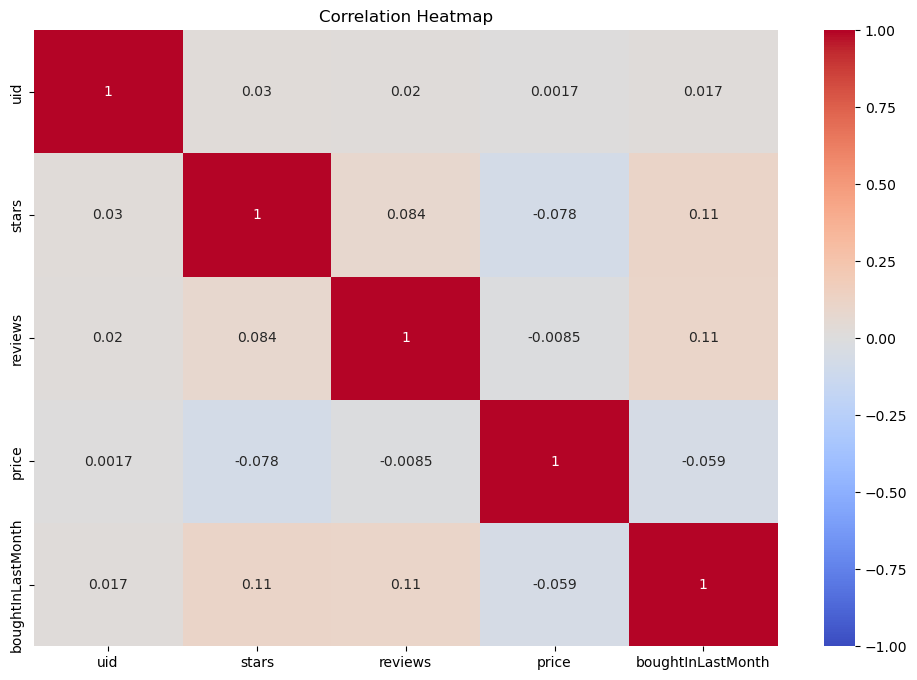

In [57]:
#2
# Select only numeric columns
numeric_df = df_no_outliers.select_dtypes(include=[np.number])

df_corr = numeric_df.corr()
print(df_corr)

plt.figure(figsize=(12, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


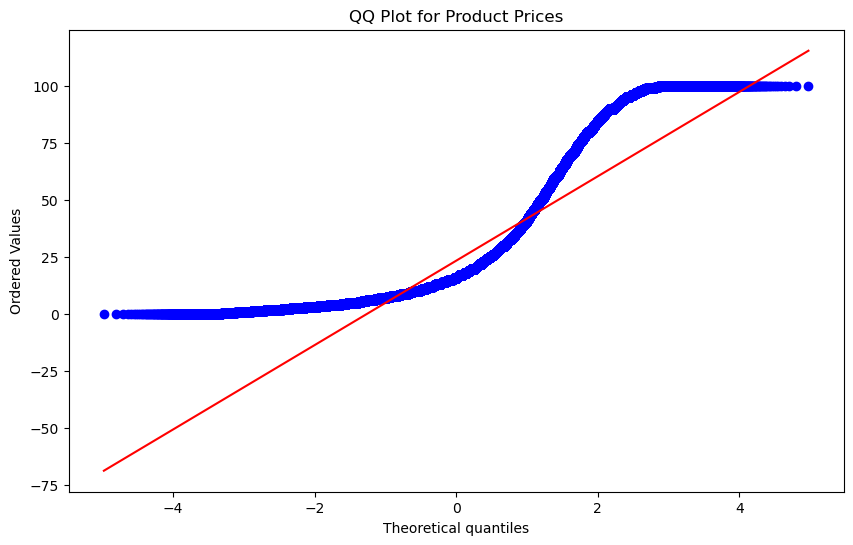

In [58]:
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot for Product Prices')
plt.show()
